## Resume Classification(Model training)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\KIIT\Desktop\MSA project/Preprocessed Data.csv' ,encoding='utf-8')
df.head()

,Unnamed: 0,Category,Resume,Cleaned_Resume,Summarised_Resume,Extracted_Text
0,0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,Skills Programming Languages Python pandas num...,skill programming language python panda numpy ...
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,Education Details May 2013 to May 2017 B E UIT...,education detail b e uit rgpv data scientist d...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,Areas of Interest Deep Learning Control System...,area interest deep learning control system des...
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skill r python sap hana tableau sap hana sql s...
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...


In [3]:
df.drop(['Unnamed: 0','Resume','Cleaned_Resume'],axis=1,inplace=True)

In [4]:
df.head()

,Category,Summarised_Resume,Extracted_Text
0,Data Science,Skills Programming Languages Python pandas num...,skill programming language python panda numpy ...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...,education detail b e uit rgpv data scientist d...
2,Data Science,Areas of Interest Deep Learning Control System...,area interest deep learning control system des...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skill r python sap hana tableau sap hana sql s...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...


In [5]:
print (df['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


### Constructing Features using Vectorizers

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Extracted_Text'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.50,
    max_features=100,
    stop_words='english')

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature construction completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature construction completed .....
(769, 100)
(193, 100)


## Model Training

### Artificial Neural Networks Algorithm - Multi Layer Perceptron Network

In [7]:
from sklearn.neural_network import MLPClassifier
clf8 = MLPClassifier(alpha=0.1, max_iter=1000)
clf8.fit(X_train.todense(), y_train)
preds8 = clf8.predict(X_test.todense())
print('Accuracy of AdaBoost Classifier on training set: {:.2f}'.format(clf8.score(X_train.todense(), y_train)))
print('Accuracy of AdaBoost Classifier on test set:     {:.2f}'.format(clf8.score(X_test.todense(), y_test)))

Accuracy of AdaBoost Classifier on training set: 1.00
Accuracy of AdaBoost Classifier on test set:     0.99


In [8]:
print("\n Classification report for classifier %s:\n%s\n" % (clf8, metrics.classification_report(y_test, preds8)))
#sns.distplot(y_test-preds8, color='teal')


 Classification report for classifier MLPClassifier(alpha=0.1, max_iter=1000):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00  

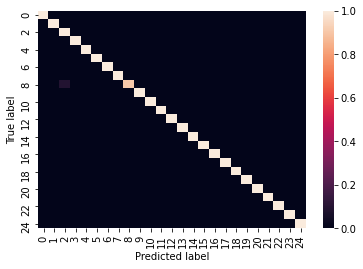

In [9]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds8)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Gaussian Naive Bayes Classifier Algorithm

In [10]:
from sklearn.naive_bayes import GaussianNB
clf6 = GaussianNB()
clf6.fit(X_train.todense(), y_train)
preds6 = clf6.predict(X_test.todense())
print('Accuracy of Naive Bayes classifiers on training set: {:.2f}'.format(clf6.score(X_train.todense(), y_train)))
print('Accuracy of Naive Bayes classifiers on test set:     {:.2f}'.format(clf6.score(X_test.todense(), y_test)))

Accuracy of Naive Bayes classifiers on training set: 0.93
Accuracy of Naive Bayes classifiers on test set:     0.96


In [11]:
print("\n Classification report for classifier %s:\n%s\n" % (clf6, metrics.classification_report(y_test, preds6)))
#sns.distplot(y_test-preds6, color='teal'


 Classification report for classifier GaussianNB():
                           precision    recall  f1-score   support

                 Advocate       0.67      1.00      0.80         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       0.89      1.00      0.94         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       0.83      1.00      0.91         5
             Data Science       1.00      0.75      0.86         8
                 Database       0.88      1.00      0.93         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      0.78      0.88         9
        

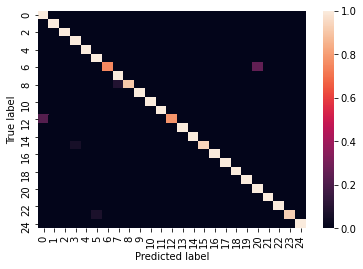

In [12]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds6)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Saving the trained models

In [13]:
import pickle

In [16]:
### Artificial Neural Network

file = open(r'C:\Users\KIIT\Desktop\MSA project\Model/mlp_net.pkl','wb')
pickle.dump(clf8, file)

In [17]:
### Gaussian NB

file = open(r'C:\Users\KIIT\Desktop\MSA project\Model/gnb.pkl','wb')
pickle.dump(clf6, file)